In [1]:
#HDBSCAN: hierarchical density-based clustering

In [2]:
import numpy as np
from sklearn.cluster import HDBSCAN
from sklearn.datasets import load_digits
from sklearn.metrics import v_measure_score

X, true_labels = load_digits(return_X_y=True)
print(f"number of digits: {len(np.unique(true_labels))}")

hdbscan = HDBSCAN(min_cluster_size=15).fit(X)
non_noisy_labels = hdbscan.labels_[hdbscan.labels_ != -1]
print(f"number of clusters found: {len(np.unique(non_noisy_labels))}")

print(v_measure_score(true_labels[hdbscan.labels_ != -1], non_noisy_labels))

number of digits: 10
number of clusters found: 10
0.9751818034688537


In [3]:
#TargetEncoder: a new category encoding strategy

In [4]:
import numpy as np
from sklearn.preprocessing import TargetEncoder

X = np.array([["cat"] * 30 + ["dog"] * 20 + ["snake"] * 38], dtype=object).T
y = [90.3] * 30 + [20.4] * 20 + [21.2] * 38

enc = TargetEncoder(random_state=0)
X_trans = enc.fit_transform(X, y)

enc.encodings_

[array([90.3, 20.4, 21.2])]

In [5]:
#Missing values support in decision trees

In [6]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

X = np.array([0, 1, 6, np.nan]).reshape(-1, 1)
y = [0, 0, 1, 1]

tree = DecisionTreeClassifier(random_state=0).fit(X, y)
tree.predict(X)

array([0, 0, 1, 1])

In [7]:
#New display model_selection.ValidationCurveDisplay

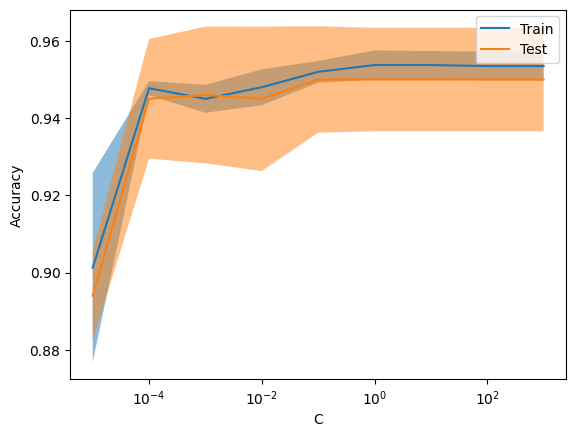

In [8]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ValidationCurveDisplay

X, y = make_classification(1000, 10, random_state=0)

_ = ValidationCurveDisplay.from_estimator(
    LogisticRegression(),
    X,
    y,
    param_name="C",
    param_range=np.geomspace(1e-5, 1e3, num=9),
    score_type="both",
    score_name="Accuracy",
)

In [9]:
#Gamma loss for gradient boosting

In [11]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_low_rank_matrix
from sklearn.ensemble import HistGradientBoostingRegressor

n_samples, n_features = 500, 10
rng = np.random.RandomState(0)
X = make_low_rank_matrix(n_samples, n_features, random_state=rng)
coef = rng.uniform(low=-10, high=20, size=n_features)
y = rng.gamma(shape=2, scale=np.exp(X @ coef) / 2)
gbdt = HistGradientBoostingRegressor(loss="gamma")
cross_val_score(gbdt, X, y).mean()

0.46858513287221665

In [ ]:
#Grouping infrequent categories in preprocessing.OrdinalEncoder

In [12]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

X = np.array(
    [["dog"] * 5 + ["cat"] * 20 + ["rabbit"] * 10 + ["snake"] * 3], dtype=object
).T
enc = OrdinalEncoder(min_frequency=6).fit(X)
enc.infrequent_categories_

[array(['dog', 'snake'], dtype=object)]